In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
np.random.seed(12)

returns = np.random.normal(0.0005, 0.01, 252)
returns = pd.Series(returns)

roll_vol = returns.rolling(20).std() * np.sqrt(252)

vol_median = roll_vol.median()

regime = (roll_vol < vol_median).astype(int)
print(regime)

0      0
1      0
2      0
3      0
4      0
      ..
247    0
248    0
249    0
250    0
251    0
Length: 252, dtype: int64


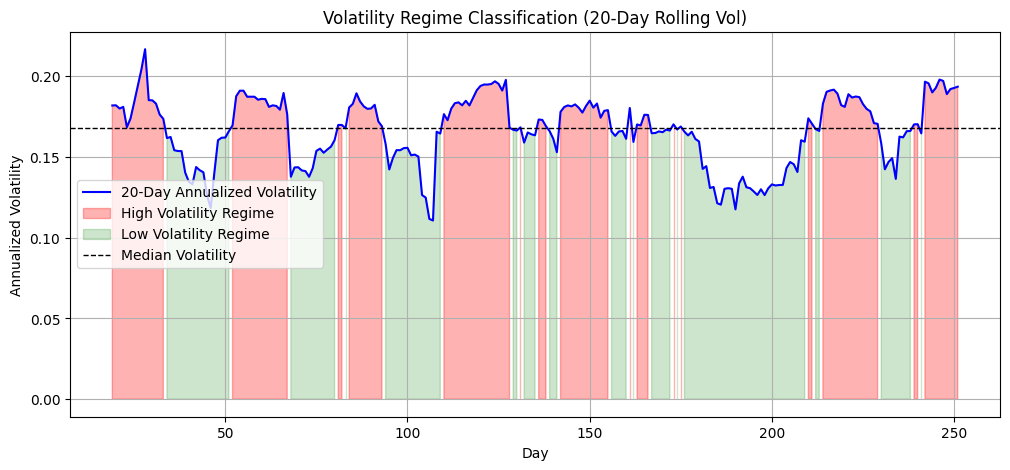

In [10]:
# --- Plot volatility with high-volatility shading ---

plt.figure(figsize=(12,5))

# Volatility line
plt.plot(roll_vol, label="20-Day Annualized Volatility", color="blue")

# Shade high-vol zones (regime = 0)
plt.fill_between(
    roll_vol.index,
    roll_vol,
    where=(regime == 0),
    color="red",
    alpha=0.3,
    label="High Volatility Regime"
)

# Shade low-vol zones (regime = 1)
plt.fill_between(
    roll_vol.index,
    roll_vol,
    where=(regime == 1),
    color="green",
    alpha=0.2,
    label="Low Volatility Regime"
)

plt.axhline(vol_median, color="black", linestyle="--", linewidth=1, label="Median Volatility")

plt.title("Volatility Regime Classification (20-Day Rolling Vol)")
plt.xlabel("Day")
plt.ylabel("Annualized Volatility")
plt.legend()
plt.grid(True)